In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras

In [ ]:
#Files and directories
import os

dataset_dir = '/content/drive/MyDrive/Yoga-16'
files = os.listdir(dataset_dir)
print("Files and directories in the dataset:", files)

Files and directories in the dataset: ['Test', 'Train', 'Valid']


In [ ]:
#Number of files in each directory
import os

# Define the dataset directory
dataset_dir = '/content/drive/MyDrive/Yoga-16'

# Correct the paths to training and testing directories
train_dir = os.path.join(dataset_dir, '/content/drive/MyDrive/Yoga-16/Train')
test_dir = os.path.join(dataset_dir, '/content/drive/MyDrive/Yoga-16/Test')
val_dir = os.path.join(dataset_dir, '/content/drive/MyDrive/Yoga-16/Valid')

# List the files in the training directory
train_files = os.listdir(train_dir) # Use the train_dir variable here
print("Number of training data files:", len(train_files))

# List the files in the testing directory
test_files = os.listdir(test_dir) # Use the test_dir variable here
print("Number of testing data files:", len(test_files))

# List the files in the validating directory
val_files = os.listdir(val_dir) # Use the val_dir variable here
print("Number of validating data files:", len(val_files))

Number of training data files: 10
Number of testing data files: 10
Number of validating data files: 10


In [ ]:
#Total number of images in each files and total number of images in the directory
import os

# Define the dataset directory - make sure this is correct!
dataset_dir = '/content/drive/MyDrive/Yoga-16'

# Correct the paths to training, testing, and validation directories
train_dir = os.path.join(dataset_dir, '/content/drive/MyDrive/Yoga-16/Train')
test_dir = os.path.join(dataset_dir, '/content/drive/MyDrive/Yoga-16/Test')
val_dir = os.path.join(dataset_dir, '/content/drive/MyDrive/Yoga-16/Valid')

# Get total number of images in the training directory and its subdirectories
total_train_files = 0
for root, dirs, files in os.walk(train_dir):
    total_train_files += len(files)
print("Total number of training data files:", total_train_files)

# Get total number of images in the testing directory and its subdirectories
total_test_files = 0
for root, dirs, files in os.walk(test_dir):
    total_test_files += len(files)
print("Total number of testing data files:", total_test_files)

# Get total number of images in the validation directory and its subdirectories
total_val_files = 0
for root, dirs, files in os.walk(val_dir):
    total_val_files += len(files)
print("Total number of validating data files:", total_val_files)

# Calculate the total number of images in the entire dataset
total_images = total_train_files + total_test_files + total_val_files
print("Total number of images in the dataset:", total_images)

Total number of training data files: 571
Total number of testing data files: 155
Total number of validating data files: 79
Total number of images in the dataset: 805


In [ ]:
def count_images_per_class(directory):

  class_counts = {}
  for root, _, files in os.walk(directory):
    class_name = os.path.basename(root)
    if class_name:
      image_count = len(files)
      class_counts[class_name] = image_count
  return class_counts

# Example usage:
train_dir = '/content/drive/MyDrive/Yoga-16/Train'
test_dir = '/content/drive/MyDrive/Yoga-16/Test'
val_dir = '/content/drive/MyDrive/Yoga-16/Valid'

train_class_counts = count_images_per_class(train_dir)
test_class_counts = count_images_per_class(test_dir)
val_class_counts = count_images_per_class(val_dir)

print("Training Class Counts:")
print(train_class_counts)

print("\nTesting Class Counts:")
print(test_class_counts)

print("\nValidating Class Counts:")
print(val_class_counts)

Training Class Counts:
{'Train': 0, 'staff_pose': 56, 'warrior_1_pose': 56, 'warrior_2_pose': 56, 'tree_pose': 56, 'dolphin_plank_pose': 56, 'downward-facing_dog_pose': 56, 'lord_of_the_dance_pose': 56, 'goddess_pose': 56, 'locust_pose': 65, 'side_plank_pose': 58}

Testing Class Counts:
{'Test': 0, 'warrior_2_pose': 15, 'staff_pose': 16, 'tree_pose': 15, 'downward-facing_dog_pose': 16, 'side_plank_pose': 15, 'dolphin_plank_pose': 16, 'locust_pose': 15, 'goddess_pose': 15, 'warrior_1_pose': 16, 'lord_of_the_dance_pose': 16}

Validating Class Counts:
{'Valid': 0, 'dolphin_plank_pose': 8, 'lord_of_the_dance_pose': 8, 'side_plank_pose': 8, 'locust_pose': 8, 'goddess_pose': 8, 'downward-facing_dog_pose': 8, 'warrior_2_pose': 8, 'warrior_1_pose': 8, 'staff_pose': 7, 'tree_pose': 8}


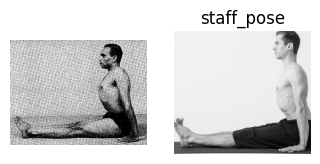

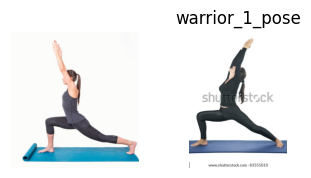

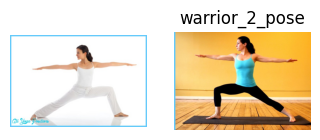

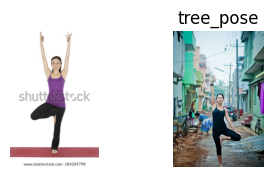

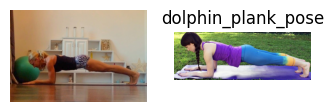

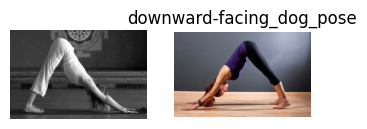

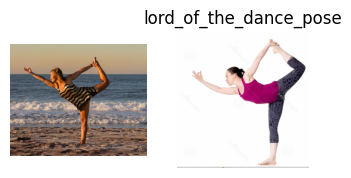

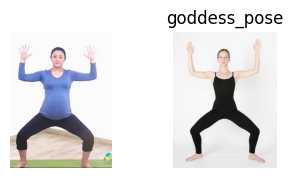

In [ ]:
import os
import random
import matplotlib.pyplot as plt

def plot_class_images(class_dir, num_images=2):
  images = os.listdir(class_dir)
  random.shuffle(images)

  plt.figure(figsize=(6, 6))
  for i in range(num_images):
    img_path = os.path.join(class_dir, images[i])
    img = plt.imread(img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
  plt.title(class_dir.split('/')[-1])  # Extract class name from directory
  plt.show()

# Path to your dataset
dataset_dir = '/content/drive/MyDrive/Yoga-16/Train'

# Get a list of class directories
class_dirs = os.listdir(dataset_dir)

# Display images for the first 8 classes
for class_dir in class_dirs[:8]:
  class_path = os.path.join(dataset_dir, class_dir)
  plot_class_images(class_path)

In [ ]:
import cv2
import os
import random
def get_image_dimensions(image_path):
  img = cv2.imread(image_path)
  height, width, channels = img.shape
  return height, width, channels
dataset_dir = '/content/drive/MyDrive/Yoga-16/Train'
num_images_per_class = 1
classes = os.listdir(dataset_dir)
selected_classes = random.sample(classes, 10)
for class_name in selected_classes:
  class_dir = os.path.join(dataset_dir, class_name)
  image_paths = os.listdir(class_dir)
  random.shuffle(image_paths)
  selected_images = image_paths[:num_images_per_class]
  for image_file in selected_images:
    image_path = os.path.join(class_dir, image_file)
    height, width, channels = get_image_dimensions(image_path)
    print(f"Image: {image_path}, Dimensions: {height}x{width}x{channels}")

Image: /content/drive/MyDrive/Yoga-16/Train/lord_of_the_dance_pose/Lord_of_the_Dance_Pose_or_Natarajasana__image_162.jpg, Dimensions: 500x333x3
Image: /content/drive/MyDrive/Yoga-16/Train/staff_pose/44-0.png, Dimensions: 613x677x3
Image: /content/drive/MyDrive/Yoga-16/Train/dolphin_plank_pose/45-0.png, Dimensions: 190x548x3
Image: /content/drive/MyDrive/Yoga-16/Train/goddess_pose/116.jpg, Dimensions: 521x377x3
Image: /content/drive/MyDrive/Yoga-16/Train/warrior_1_pose/Warrior_I_Pose_or_Virabhadrasana_I__image_173.jpg, Dimensions: 346x320x3
Image: /content/drive/MyDrive/Yoga-16/Train/tree_pose/Tree_Pose_or_Vrksasana__image_159.jpg, Dimensions: 1600x1001x3
Image: /content/drive/MyDrive/Yoga-16/Train/locust_pose/Locust_Pose_or_Salabhasana__image_247.jpg, Dimensions: 99x236x3
Image: /content/drive/MyDrive/Yoga-16/Train/downward-facing_dog_pose/Downward-Facing_Dog_pose_or_Adho_Mukha_Svanasana__image_103.jpg, Dimensions: 897x1300x3
Image: /content/drive/MyDrive/Yoga-16/Train/side_plank_pose/

In [ ]:
import cv2
import os
import random
def get_image_dimensions(image_path):
  img = cv2.imread(image_path)
  height, width, channels = img.shape
  return height, width, channels
dataset_dir = '/content/drive/MyDrive/Yoga-16/Test'
num_images_per_class = 1
classes = os.listdir(dataset_dir)
selected_classes = random.sample(classes, 10)
for class_name in selected_classes:
  class_dir = os.path.join(dataset_dir, class_name)
  image_paths = os.listdir(class_dir)
  random.shuffle(image_paths)
  selected_images = image_paths[:num_images_per_class]
  for image_file in selected_images:
    image_path = os.path.join(class_dir, image_file)
    height, width, channels = get_image_dimensions(image_path)
    print(f"Image: {image_path}, Dimensions: {height}x{width}x{channels}")

Image: /content/drive/MyDrive/Yoga-16/Test/warrior_2_pose/Warrior_II_Pose_or_Virabhadrasana_II__image_42.jpg, Dimensions: 325x383x3
Image: /content/drive/MyDrive/Yoga-16/Test/downward-facing_dog_pose/Downward-Facing_Dog_pose_or_Adho_Mukha_Svanasana__image_22.jpg, Dimensions: 460x675x3
Image: /content/drive/MyDrive/Yoga-16/Test/tree_pose/Tree_Pose_or_Vrksasana__image_13.jpg, Dimensions: 673x402x3
Image: /content/drive/MyDrive/Yoga-16/Test/locust_pose/Locust_Pose_or_Salabhasana__image_32.jpg, Dimensions: 216x466x3
Image: /content/drive/MyDrive/Yoga-16/Test/dolphin_plank_pose/21-0.png, Dimensions: 112x521x3
Image: /content/drive/MyDrive/Yoga-16/Test/goddess_pose/25.jpg, Dimensions: 487x730x3
Image: /content/drive/MyDrive/Yoga-16/Test/side_plank_pose/Side_Plank_Pose_or_Vasisthasana__image_28.jpg, Dimensions: 347x385x3
Image: /content/drive/MyDrive/Yoga-16/Test/warrior_1_pose/Warrior_I_Pose_or_Virabhadrasana_I__image_20.jpg, Dimensions: 425x360x3
Image: /content/drive/MyDrive/Yoga-16/Test/l

In [ ]:
import cv2
import os
import random
def get_image_dimensions(image_path):
  img = cv2.imread(image_path)
  height, width, channels = img.shape
  return height, width, channels
dataset_dir = '/content/drive/MyDrive/Yoga-16/Valid'
num_images_per_class = 1
classes = os.listdir(dataset_dir)
selected_classes = random.sample(classes, 10)
for class_name in selected_classes:
  class_dir = os.path.join(dataset_dir, class_name)
  image_paths = os.listdir(class_dir)
  random.shuffle(image_paths)
  selected_images = image_paths[:num_images_per_class]
  for image_file in selected_images:
    image_path = os.path.join(class_dir, image_file)
    height, width, channels = get_image_dimensions(image_path)
    print(f"Image: {image_path}, Dimensions: {height}x{width}x{channels}")

Image: /content/drive/MyDrive/Yoga-16/Valid/lord_of_the_dance_pose/Lord_of_the_Dance_Pose_or_Natarajasana__image_131.jpg, Dimensions: 225x257x3
Image: /content/drive/MyDrive/Yoga-16/Valid/side_plank_pose/Side_Plank_Pose_or_Vasisthasana__image_93.jpg, Dimensions: 533x800x3
Image: /content/drive/MyDrive/Yoga-16/Valid/dolphin_plank_pose/35-0.png, Dimensions: 289x913x3
Image: /content/drive/MyDrive/Yoga-16/Valid/staff_pose/20-0.png, Dimensions: 257x292x3
Image: /content/drive/MyDrive/Yoga-16/Valid/warrior_1_pose/Warrior_I_Pose_or_Virabhadrasana_I__image_105.jpg, Dimensions: 454x450x3
Image: /content/drive/MyDrive/Yoga-16/Valid/tree_pose/Tree_Pose_or_Vrksasana__image_128.jpg, Dimensions: 661x390x3
Image: /content/drive/MyDrive/Yoga-16/Valid/goddess_pose/59.jpg, Dimensions: 465x422x3
Image: /content/drive/MyDrive/Yoga-16/Valid/downward-facing_dog_pose/Downward-Facing_Dog_pose_or_Adho_Mukha_Svanasana__image_93.jpg, Dimensions: 355x470x3
Image: /content/drive/MyDrive/Yoga-16/Valid/warrior_2_po

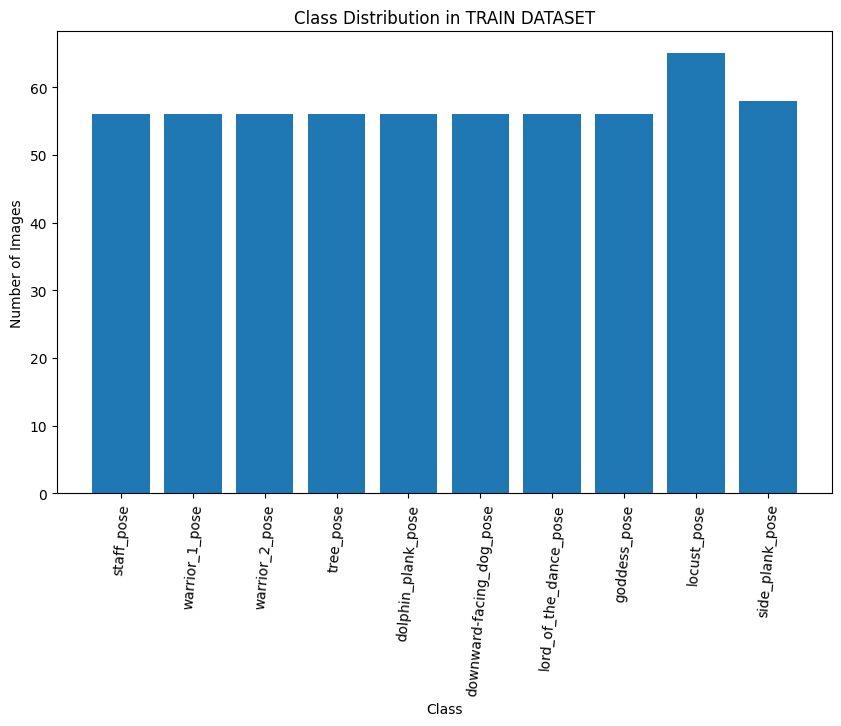

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_in_classes(parent_dir):

    class_counts = {}

    # Iterate over each folder in the parent directory
    for class_folder in os.listdir(parent_dir):
        class_path = os.path.join(parent_dir, class_folder)

        # Check if it is a directory
        if os.path.isdir(class_path):
            # Count the number of images in the class folder
            num_images = len(os.listdir(class_path))
            class_counts[class_folder] = num_images

    return class_counts

# Set the parent directory path for the TRAIN dataset
train_dir = '/content/drive/MyDrive/Yoga-16/Train'

# Get the image counts for each class
train_class_counts = count_images_in_classes(train_dir)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in TRAIN DATASET')
plt.xticks(rotation=85)
plt.show()

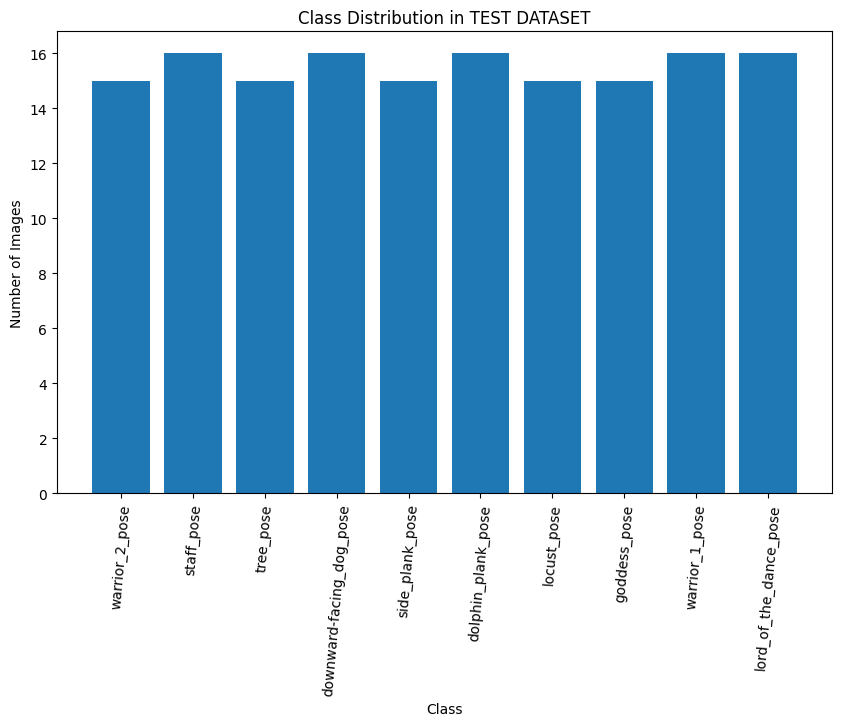

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_in_classes(parent_dir):

    class_counts = {}

    # Iterate over each folder in the parent directory
    for class_folder in os.listdir(parent_dir):
        class_path = os.path.join(parent_dir, class_folder)

        # Check if it is a directory
        if os.path.isdir(class_path):
            # Count the number of images in the class folder
            num_images = len(os.listdir(class_path))
            class_counts[class_folder] = num_images

    return class_counts

# Set the parent directory path for the TRAIN dataset
test_dir = '/content/drive/MyDrive/Yoga-16/Test'

# Get the image counts for each class
test_class_counts = count_images_in_classes(test_dir)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(test_class_counts.keys(), test_class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in TEST DATASET')
plt.xticks(rotation=85)
plt.show()

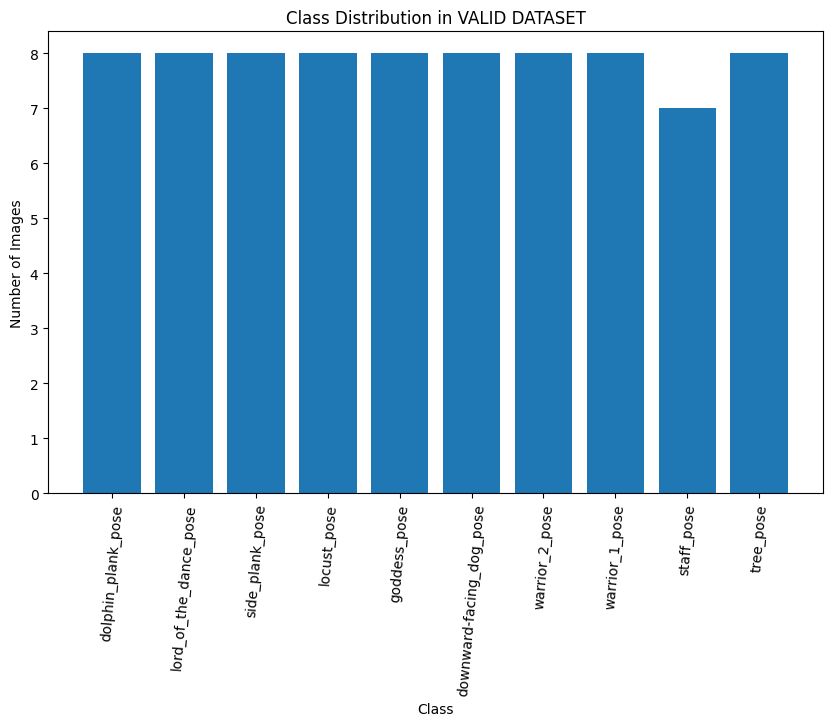

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_in_classes(parent_dir):

    class_counts = {}

    # Iterate over each folder in the parent directory
    for class_folder in os.listdir(parent_dir):
        class_path = os.path.join(parent_dir, class_folder)

        # Check if it is a directory
        if os.path.isdir(class_path):
            # Count the number of images in the class folder
            num_images = len(os.listdir(class_path))
            class_counts[class_folder] = num_images

    return class_counts

# Set the parent directory path for the TRAIN dataset
valid_dir = '/content/drive/MyDrive/Yoga-16/Valid'

# Get the image counts for each class
valid_class_counts = count_images_in_classes(valid_dir)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(valid_class_counts.keys(), valid_class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in VALID DATASET')
plt.xticks(rotation=85)
plt.show()

Data Preprocessing

In [ ]:
import os
from PIL import Image

def resize_images_in_directory(input_folder, output_folder, size=(224, 224)):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Walk through the input folder
    for root, dirs, files in os.walk(input_folder):
        # Calculate the relative path for the output folder structure
        relative_path = os.path.relpath(root, input_folder)
        target_output_folder = os.path.join(output_folder, relative_path)

        # Create the corresponding target output folder if it doesn't exist
        if not os.path.exists(target_output_folder):
            os.makedirs(target_output_folder)

        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        # Resize the image to the desired size
                        img_resized = img.resize(size, Image.LANCZOS)

                        # Convert to RGB if the image is not in 'RGB' mode
                        if img_resized.mode != 'RGB':
                            img_resized = img_resized.convert('RGB')

                        # Save the resized image to the corresponding output folder
                        output_file_path = os.path.join(target_output_folder, file)
                        img_resized.save(output_file_path)

                        print(f"Resized and saved: {output_file_path}")
                except Exception as e:
                    print(f"Error processing file {file}: {e}")


input_folder = '/content/drive/MyDrive/Yoga-16/Train'
output_folder = '/content/drive/MyDrive/Yoga-16/New Train'

# Call the function to resize all images
resize_images_in_directory(input_folder, output_folder, size=(224, 224))


Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/dolphin_plank_pose/51-0.png
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/dolphin_plank_pose/00000415.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/dolphin_plank_pose/00000426.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/dolphin_plank_pose/41-0.png
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/dolphin_plank_pose/48-0.png
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/dolphin_plank_pose/46-0.png
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/dolphin_plank_pose/45-0.png
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/dolphin_plank_pose/40-0.png
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/dolphin_plank_pose/00000428.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/dolphin_plank_pose/00000418.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/dolphin_plank_pose/Dolphin_Plank_Pose_or_Mak

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/lord_of_the_dance_pose/Lord_of_the_Dance_Pose_or_Natarajasana__image_416.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/lord_of_the_dance_pose/Lord_of_the_Dance_Pose_or_Natarajasana__image_354.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/lord_of_the_dance_pose/Lord_of_the_Dance_Pose_or_Natarajasana__image_349.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/lord_of_the_dance_pose/Lord_of_the_Dance_Pose_or_Natarajasana__image_324.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/lord_of_the_dance_pose/Lord_of_the_Dance_Pose_or_Natarajasana__image_400.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/lord_of_the_dance_pose/Lord_of_the_Dance_Pose_or_Natarajasana__image_348.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Train/lord_of_the_dance_pose/Lord_of_the_Dance_Pose_or_Natarajasana__image_390.jpg
Resized and saved: /content/drive/MyDrive

In [ ]:
import os
from PIL import Image

def resize_images_in_directory(input_folder, output_folder, size=(224, 224)):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Walk through the input folder
    for root, dirs, files in os.walk(input_folder):
        # Calculate the relative path for the output folder structure
        relative_path = os.path.relpath(root, input_folder)
        target_output_folder = os.path.join(output_folder, relative_path)

        # Create the corresponding target output folder if it doesn't exist
        if not os.path.exists(target_output_folder):
            os.makedirs(target_output_folder)

        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        # Resize the image to the desired size
                        img_resized = img.resize(size, Image.LANCZOS)

                        # Convert to RGB if the image is not in 'RGB' mode
                        if img_resized.mode != 'RGB':
                            img_resized = img_resized.convert('RGB')

                        # Save the resized image to the corresponding output folder
                        output_file_path = os.path.join(target_output_folder, file)
                        img_resized.save(output_file_path)

                        print(f"Resized and saved: {output_file_path}")
                except Exception as e:
                    print(f"Error processing file {file}: {e}")


input_folder = '/content/drive/MyDrive/Yoga-16/Test'
output_folder = '/content/drive/MyDrive/Yoga-16/New Test'

# Call the function to resize all images
resize_images_in_directory(input_folder, output_folder, size=(224, 224))


Resized and saved: /content/drive/MyDrive/Yoga-16/New Test/warrior_2_pose/Warrior_II_Pose_or_Virabhadrasana_II__image_27.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Test/warrior_2_pose/Warrior_II_Pose_or_Virabhadrasana_II__image_17.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Test/warrior_2_pose/Warrior_II_Pose_or_Virabhadrasana_II__image_42.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Test/warrior_2_pose/Warrior_II_Pose_or_Virabhadrasana_II__image_19.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Test/warrior_2_pose/Warrior_II_Pose_or_Virabhadrasana_II__image_23.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Test/warrior_2_pose/Warrior_II_Pose_or_Virabhadrasana_II__image_10.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Test/warrior_2_pose/Warrior_II_Pose_or_Virabhadrasana_II__image_11.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Test/warrior_2_pose/Warrior_II_Pose_or_Virabhadrasana_II__image_29.jpg


In [ ]:
import os
from PIL import Image

def resize_images_in_directory(input_folder, output_folder, size=(224, 224)):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Walk through the input folder
    for root, dirs, files in os.walk(input_folder):
        # Calculate the relative path for the output folder structure
        relative_path = os.path.relpath(root, input_folder)
        target_output_folder = os.path.join(output_folder, relative_path)

        # Create the corresponding target output folder if it doesn't exist
        if not os.path.exists(target_output_folder):
            os.makedirs(target_output_folder)

        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        # Resize the image to the desired size
                        img_resized = img.resize(size, Image.LANCZOS)

                        # Convert to RGB if the image is not in 'RGB' mode
                        if img_resized.mode != 'RGB':
                            img_resized = img_resized.convert('RGB')

                        # Save the resized image to the corresponding output folder
                        output_file_path = os.path.join(target_output_folder, file)
                        img_resized.save(output_file_path)

                        print(f"Resized and saved: {output_file_path}")
                except Exception as e:
                    print(f"Error processing file {file}: {e}")


input_folder = '/content/drive/MyDrive/Yoga-16/Valid'
output_folder = '/content/drive/MyDrive/Yoga-16/New Valid'

# Call the function to resize all images
resize_images_in_directory(input_folder, output_folder, size=(224, 224))


Resized and saved: /content/drive/MyDrive/Yoga-16/New Valid/dolphin_plank_pose/35-0.png
Resized and saved: /content/drive/MyDrive/Yoga-16/New Valid/dolphin_plank_pose/32-0.png
Resized and saved: /content/drive/MyDrive/Yoga-16/New Valid/dolphin_plank_pose/33-0.png
Resized and saved: /content/drive/MyDrive/Yoga-16/New Valid/dolphin_plank_pose/30-0.png
Resized and saved: /content/drive/MyDrive/Yoga-16/New Valid/dolphin_plank_pose/36-0.png
Resized and saved: /content/drive/MyDrive/Yoga-16/New Valid/dolphin_plank_pose/29-0.png
Resized and saved: /content/drive/MyDrive/Yoga-16/New Valid/dolphin_plank_pose/34-0.png
Resized and saved: /content/drive/MyDrive/Yoga-16/New Valid/dolphin_plank_pose/37-0.png
Resized and saved: /content/drive/MyDrive/Yoga-16/New Valid/downward-facing_dog_pose/Downward-Facing_Dog_pose_or_Adho_Mukha_Svanasana__image_102.jpg
Resized and saved: /content/drive/MyDrive/Yoga-16/New Valid/downward-facing_dog_pose/Downward-Facing_Dog_pose_or_Adho_Mukha_Svanasana__image_90.jpg

In [ ]:
import cv2
import os
import random
def get_image_dimensions(image_path):
  img = cv2.imread(image_path)
  height, width, channels = img.shape
  return height, width, channels
dataset_dir = '/content/drive/MyDrive/Yoga-16/New Valid'
num_images_per_class = 1
classes = os.listdir(dataset_dir)
selected_classes = random.sample(classes, 10)
for class_name in selected_classes:
  class_dir = os.path.join(dataset_dir, class_name)
  image_paths = os.listdir(class_dir)
  random.shuffle(image_paths)
  selected_images = image_paths[:num_images_per_class]
  for image_file in selected_images:
    image_path = os.path.join(class_dir, image_file)
    height, width, channels = get_image_dimensions(image_path)
    print(f"Image: {image_path}, Dimensions: {height}x{width}x{channels}")

Image: /content/drive/MyDrive/Yoga-16/New Valid/tree_pose/Tree_Pose_or_Vrksasana__image_116.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga-16/New Valid/warrior_2_pose/Warrior_II_Pose_or_Virabhadrasana_II__image_53.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga-16/New Valid/dolphin_plank_pose/32-0.png, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga-16/New Valid/staff_pose/24-0.png, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga-16/New Valid/side_plank_pose/Side_Plank_Pose_or_Vasisthasana__image_85.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga-16/New Valid/warrior_1_pose/Warrior_I_Pose_or_Virabhadrasana_I__image_101.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga-16/New Valid/downward-facing_dog_pose/Downward-Facing_Dog_pose_or_Adho_Mukha_Svanasana__image_98.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga-16/New Valid/locust_pose/Locust_Pose_or_Salabhasana__image_67.jpg, Dimensions: 224x224x3
Im

In [ ]:
import os
import shutil
import random

def oversample_images(folder_path, target_count):

    images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    current_count = len(images)

    if current_count >= target_count:
        print(f"Folder '{folder_path}' already has {current_count} images or more. No oversampling needed.")
        return

    print(f"Oversampling '{folder_path}' from {current_count} to {target_count} images.")

    while len(images) < target_count:
        image_to_duplicate = random.choice(images)
        base_name, ext = os.path.splitext(image_to_duplicate)
        duplicate_filename = f"{base_name}_copy{len(images)}{ext}"
        duplicate_path = os.path.join(folder_path, duplicate_filename)
        shutil.copyfile(os.path.join(folder_path, image_to_duplicate), duplicate_path)
        images.append(duplicate_filename)

    print(f"Completed oversampling for '{folder_path}'. It now has {len(images)} images.")

def undersample_images(folder_path, target_count):

    images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    current_count = len(images)

    if current_count <= target_count:
        print(f"Folder '{folder_path}' already has {current_count} images or less. No undersampling needed.")
        return

    print(f"Undersampling '{folder_path}' from {current_count} to {target_count} images.")

    images_to_remove = random.sample(images, current_count - target_count)
    for image in images_to_remove:
        os.remove(os.path.join(folder_path, image))

    print(f"Completed undersampling for '{folder_path}'. It now has {target_count} images.")

def equalize_subfolders(valid_folder, target_count):

    # Get a list of all subfolders in the train folder
    subfolders = [os.path.join(valid_folder, subfolder) for subfolder in os.listdir(valid_folder) if os.path.isdir(os.path.join(valid_folder, subfolder))]

    for subfolder in subfolders:
        image_count = len([f for f in os.listdir(subfolder) if os.path.isfile(os.path.join(subfolder, f))])

        if image_count < target_count:
            oversample_images(subfolder, target_count)
        elif image_count > target_count:
            undersample_images(subfolder, target_count)
        else:
            print(f"Subfolder '{subfolder}' already has the target count of {image_count} images.")

# Set the path to your valid folder and target number of images per subfolder
valid_folder_path = '/content/drive/MyDrive/Yoga-16/New Valid'
target_image_count = 50

# Equalize the number of images in each subfolder to the target count
equalize_subfolders(valid_folder_path, target_image_count)

Subfolder '/content/drive/MyDrive/Yoga-16/New Valid/dolphin_plank_pose' already has the target count of 50 images.
Oversampling '/content/drive/MyDrive/Yoga-16/New Valid/downward-facing_dog_pose' from 48 to 50 images.
Completed oversampling for '/content/drive/MyDrive/Yoga-16/New Valid/downward-facing_dog_pose'. It now has 50 images.
Subfolder '/content/drive/MyDrive/Yoga-16/New Valid/locust_pose' already has the target count of 50 images.
Subfolder '/content/drive/MyDrive/Yoga-16/New Valid/goddess_pose' already has the target count of 50 images.
Subfolder '/content/drive/MyDrive/Yoga-16/New Valid/lord_of_the_dance_pose' already has the target count of 50 images.
Oversampling '/content/drive/MyDrive/Yoga-16/New Valid/side_plank_pose' from 49 to 50 images.
Completed oversampling for '/content/drive/MyDrive/Yoga-16/New Valid/side_plank_pose'. It now has 50 images.
Subfolder '/content/drive/MyDrive/Yoga-16/New Valid/tree_pose' already has the target count of 50 images.
Subfolder '/content

In [ ]:
import os

def count_images_in_subfolders(parent_dir):

    subfolder_counts = {}

    # Iterate over each folder in the parent directory
    for subfolder in os.listdir(parent_dir):
        subfolder_path = os.path.join(parent_dir, subfolder)

        # Check if it is a directory
        if os.path.isdir(subfolder_path):
            # Count the number of images in the subfolder
            num_images = len([f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))])
            subfolder_counts[subfolder] = num_images

    return subfolder_counts

# Set the parent directory path
parent_dir = '/content/drive/MyDrive/Yoga-16/New Valid'  # Replace with your actual path

# Get the image counts for each subfolder
subfolder_image_counts = count_images_in_subfolders(parent_dir)

# Print the results
for subfolder, count in subfolder_image_counts.items():
    print(f"Subfolder '{subfolder}' contains {count} images.")

Subfolder 'dolphin_plank_pose' contains 50 images.
Subfolder 'downward-facing_dog_pose' contains 50 images.
Subfolder 'locust_pose' contains 50 images.
Subfolder 'goddess_pose' contains 50 images.
Subfolder 'lord_of_the_dance_pose' contains 50 images.
Subfolder 'side_plank_pose' contains 50 images.
Subfolder 'tree_pose' contains 50 images.
Subfolder 'staff_pose' contains 50 images.
Subfolder 'warrior_2_pose' contains 50 images.
Subfolder 'warrior_1_pose' contains 50 images.


In [ ]:
import os
import shutil
import random

def oversample_images(folder_path, target_count):

    images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    current_count = len(images)

    if current_count >= target_count:
        print(f"Folder '{folder_path}' already has {current_count} images or more. No oversampling needed.")
        return

    print(f"Oversampling '{folder_path}' from {current_count} to {target_count} images.")

    while len(images) < target_count:
        image_to_duplicate = random.choice(images)
        base_name, ext = os.path.splitext(image_to_duplicate)
        duplicate_filename = f"{base_name}_copy{len(images)}{ext}"
        duplicate_path = os.path.join(folder_path, duplicate_filename)
        shutil.copyfile(os.path.join(folder_path, image_to_duplicate), duplicate_path)
        images.append(duplicate_filename)

    print(f"Completed oversampling for '{folder_path}'. It now has {len(images)} images.")

def undersample_images(folder_path, target_count):

    images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    current_count = len(images)

    if current_count <= target_count:
        print(f"Folder '{folder_path}' already has {current_count} images or less. No undersampling needed.")
        return

    print(f"Undersampling '{folder_path}' from {current_count} to {target_count} images.")

    images_to_remove = random.sample(images, current_count - target_count)
    for image in images_to_remove:
        os.remove(os.path.join(folder_path, image))

    print(f"Completed undersampling for '{folder_path}'. It now has {target_count} images.")

def equalize_subfolders(test_folder, target_count):

    # Get a list of all subfolders in the train folder
    subfolders = [os.path.join(test_folder, subfolder) for subfolder in os.listdir(test_folder) if os.path.isdir(os.path.join(test_folder, subfolder))]

    for subfolder in subfolders:
        image_count = len([f for f in os.listdir(subfolder) if os.path.isfile(os.path.join(subfolder, f))])

        if image_count < target_count:
            oversample_images(subfolder, target_count)
        elif image_count > target_count:
            undersample_images(subfolder, target_count)
        else:
            print(f"Subfolder '{subfolder}' already has the target count of {image_count} images.")

# Set the path to your valid folder and target number of images per subfolder
test_folder_path = '/content/drive/MyDrive/Yoga-16/New Test'
target_image_count = 25

# Equalize the number of images in each subfolder to the target count
equalize_subfolders(test_folder_path, target_image_count)

Undersampling '/content/drive/MyDrive/Yoga-16/New Test/warrior_2_pose' from 50 to 25 images.
Completed undersampling for '/content/drive/MyDrive/Yoga-16/New Test/warrior_2_pose'. It now has 25 images.
Undersampling '/content/drive/MyDrive/Yoga-16/New Test/staff_pose' from 50 to 25 images.
Completed undersampling for '/content/drive/MyDrive/Yoga-16/New Test/staff_pose'. It now has 25 images.
Undersampling '/content/drive/MyDrive/Yoga-16/New Test/tree_pose' from 50 to 25 images.
Completed undersampling for '/content/drive/MyDrive/Yoga-16/New Test/tree_pose'. It now has 25 images.
Undersampling '/content/drive/MyDrive/Yoga-16/New Test/downward-facing_dog_pose' from 50 to 25 images.
Completed undersampling for '/content/drive/MyDrive/Yoga-16/New Test/downward-facing_dog_pose'. It now has 25 images.
Undersampling '/content/drive/MyDrive/Yoga-16/New Test/side_plank_pose' from 50 to 25 images.
Completed undersampling for '/content/drive/MyDrive/Yoga-16/New Test/side_plank_pose'. It now has 25

In [ ]:
import os

def count_images_in_subfolders(parent_dir):

    subfolder_counts = {}

    # Iterate over each folder in the parent directory
    for subfolder in os.listdir(parent_dir):
        subfolder_path = os.path.join(parent_dir, subfolder)

        # Check if it is a directory
        if os.path.isdir(subfolder_path):
            # Count the number of images in the subfolder
            num_images = len([f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))])
            subfolder_counts[subfolder] = num_images

    return subfolder_counts

# Set the parent directory path
parent_dir = '/content/drive/MyDrive/Yoga-16/New Test'

# Get the image counts for each subfolder
subfolder_image_counts = count_images_in_subfolders(parent_dir)

# Print the results
for subfolder, count in subfolder_image_counts.items():
    print(f"Subfolder '{subfolder}' contains {count} images.")

Subfolder 'warrior_2_pose' contains 25 images.
Subfolder 'staff_pose' contains 25 images.
Subfolder 'tree_pose' contains 25 images.
Subfolder 'downward-facing_dog_pose' contains 25 images.
Subfolder 'side_plank_pose' contains 25 images.
Subfolder 'dolphin_plank_pose' contains 25 images.
Subfolder 'locust_pose' contains 25 images.
Subfolder 'goddess_pose' contains 25 images.
Subfolder 'warrior_1_pose' contains 25 images.
Subfolder 'lord_of_the_dance_pose' contains 25 images.


In [ ]:
import os
import shutil
import random

def oversample_images(folder_path, target_count):

    images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    current_count = len(images)

    if current_count >= target_count:
        print(f"Folder '{folder_path}' already has {current_count} images or more. No oversampling needed.")
        return

    print(f"Oversampling '{folder_path}' from {current_count} to {target_count} images.")

    while len(images) < target_count:
        image_to_duplicate = random.choice(images)
        base_name, ext = os.path.splitext(image_to_duplicate)
        duplicate_filename = f"{base_name}_copy{len(images)}{ext}"
        duplicate_path = os.path.join(folder_path, duplicate_filename)
        shutil.copyfile(os.path.join(folder_path, image_to_duplicate), duplicate_path)
        images.append(duplicate_filename)

    print(f"Completed oversampling for '{folder_path}'. It now has {len(images)} images.")

def undersample_images(folder_path, target_count):

    images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    current_count = len(images)

    if current_count <= target_count:
        print(f"Folder '{folder_path}' already has {current_count} images or less. No undersampling needed.")
        return

    print(f"Undersampling '{folder_path}' from {current_count} to {target_count} images.")

    images_to_remove = random.sample(images, current_count - target_count)
    for image in images_to_remove:
        os.remove(os.path.join(folder_path, image))

    print(f"Completed undersampling for '{folder_path}'. It now has {target_count} images.")

def equalize_subfolders(train_folder, target_count):

    # Get a list of all subfolders in the train folder
    subfolders = [os.path.join(train_folder, subfolder) for subfolder in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, subfolder))]

    for subfolder in subfolders:
        image_count = len([f for f in os.listdir(subfolder) if os.path.isfile(os.path.join(subfolder, f))])

        if image_count < target_count:
            oversample_images(subfolder, target_count)
        elif image_count > target_count:
            undersample_images(subfolder, target_count)
        else:
            print(f"Subfolder '{subfolder}' already has the target count of {image_count} images.")

# Set the path to your train folder and target number of images per subfolder
train_folder_path = '/content/drive/MyDrive/Yoga-16/New Train'
target_image_count = 100

# Equalize the number of images in each subfolder to the target count
equalize_subfolders(train_folder_path, target_image_count)

Oversampling '/content/drive/MyDrive/Yoga-16/New Train/dolphin_plank_pose' from 56 to 100 images.
Completed oversampling for '/content/drive/MyDrive/Yoga-16/New Train/dolphin_plank_pose'. It now has 100 images.
Oversampling '/content/drive/MyDrive/Yoga-16/New Train/downward-facing_dog_pose' from 56 to 100 images.
Completed oversampling for '/content/drive/MyDrive/Yoga-16/New Train/downward-facing_dog_pose'. It now has 100 images.
Oversampling '/content/drive/MyDrive/Yoga-16/New Train/lord_of_the_dance_pose' from 56 to 100 images.
Completed oversampling for '/content/drive/MyDrive/Yoga-16/New Train/lord_of_the_dance_pose'. It now has 100 images.
Oversampling '/content/drive/MyDrive/Yoga-16/New Train/goddess_pose' from 56 to 100 images.
Completed oversampling for '/content/drive/MyDrive/Yoga-16/New Train/goddess_pose'. It now has 100 images.
Oversampling '/content/drive/MyDrive/Yoga-16/New Train/tree_pose' from 56 to 100 images.
Completed oversampling for '/content/drive/MyDrive/Yoga-16/

In [ ]:
import os

def count_images_in_subfolders(parent_dir):

    subfolder_counts = {}

    # Iterate over each folder in the parent directory
    for subfolder in os.listdir(parent_dir):
        subfolder_path = os.path.join(parent_dir, subfolder)

        # Check if it is a directory
        if os.path.isdir(subfolder_path):
            # Count the number of images in the subfolder
            num_images = len([f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))])
            subfolder_counts[subfolder] = num_images

    return subfolder_counts

# Set the parent directory path
parent_dir = '/content/drive/MyDrive/Yoga-16/New Train'

# Get the image counts for each subfolder
subfolder_image_counts = count_images_in_subfolders(parent_dir)

# Print the results
for subfolder, count in subfolder_image_counts.items():
    print(f"Subfolder '{subfolder}' contains {count} images.")

Subfolder 'dolphin_plank_pose' contains 100 images.
Subfolder 'downward-facing_dog_pose' contains 100 images.
Subfolder 'lord_of_the_dance_pose' contains 100 images.
Subfolder 'goddess_pose' contains 100 images.
Subfolder 'tree_pose' contains 100 images.
Subfolder 'warrior_2_pose' contains 100 images.
Subfolder 'locust_pose' contains 100 images.
Subfolder 'side_plank_pose' contains 100 images.
Subfolder 'staff_pose' contains 100 images.
Subfolder 'warrior_1_pose' contains 100 images.


In [ ]:
#Total number of images in each files and total number of images in the directory
import os

# Define the dataset directory - make sure this is correct!
dataset_dir = '/content/drive/MyDrive/Yoga-16'

# Correct the paths to training, testing, and validation directories
train_dir = os.path.join(dataset_dir, '/content/drive/MyDrive/Yoga-16/New Train')
test_dir = os.path.join(dataset_dir, '/content/drive/MyDrive/Yoga-16/New Test')
val_dir = os.path.join(dataset_dir, '/content/drive/MyDrive/Yoga-16/New Valid')

# Get total number of images in the training directory and its subdirectories
total_train_files = 0
for root, dirs, files in os.walk(train_dir):
    total_train_files += len(files)
print("Total number of training data files:", total_train_files)

# Get total number of images in the testing directory and its subdirectories
total_test_files = 0
for root, dirs, files in os.walk(test_dir):
    total_test_files += len(files)
print("Total number of testing data files:", total_test_files)

# Get total number of images in the validation directory and its subdirectories
total_val_files = 0
for root, dirs, files in os.walk(val_dir):
    total_val_files += len(files)
print("Total number of validating data files:", total_val_files)

# Calculate the total number of images in the entire dataset
total_images = total_train_files + total_test_files + total_val_files
print("Total number of images in the dataset:", total_images)

Total number of training data files: 1000
Total number of testing data files: 250
Total number of validating data files: 500
Total number of images in the dataset: 1750


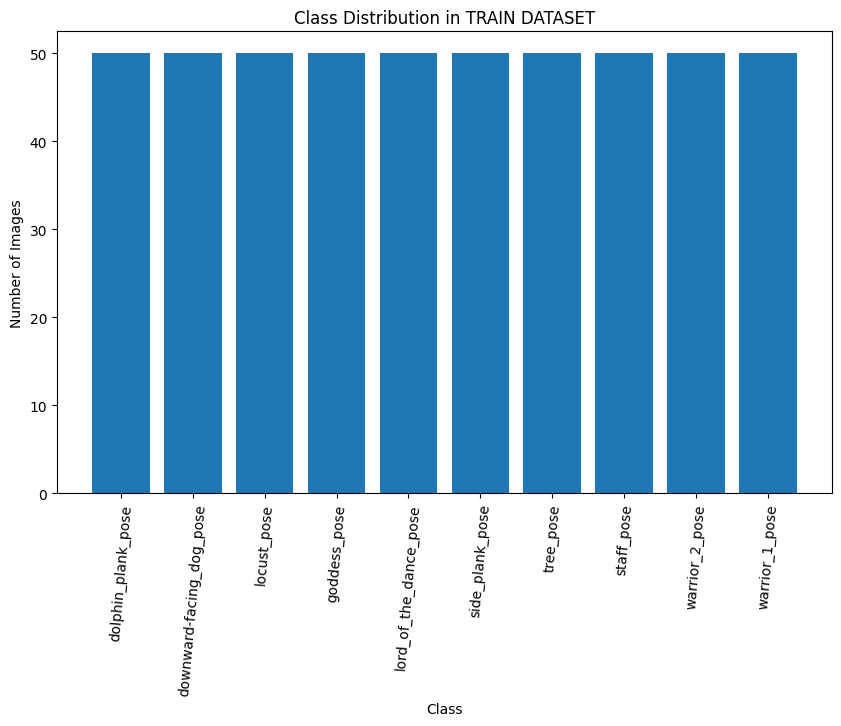

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_in_classes(parent_dir):

    class_counts = {}

    # Iterate over each folder in the parent directory
    for class_folder in os.listdir(parent_dir):
        class_path = os.path.join(parent_dir, class_folder)

        # Check if it is a directory
        if os.path.isdir(class_path):
            # Count the number of images in the class folder
            num_images = len(os.listdir(class_path))
            class_counts[class_folder] = num_images

    return class_counts

# Set the parent directory path for the TRAIN dataset
train_dir = '/content/drive/MyDrive/Yoga-16/New Valid'

# Get the image counts for each class
train_class_counts = count_images_in_classes(train_dir)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in TRAIN DATASET')
plt.xticks(rotation=85)
plt.show()

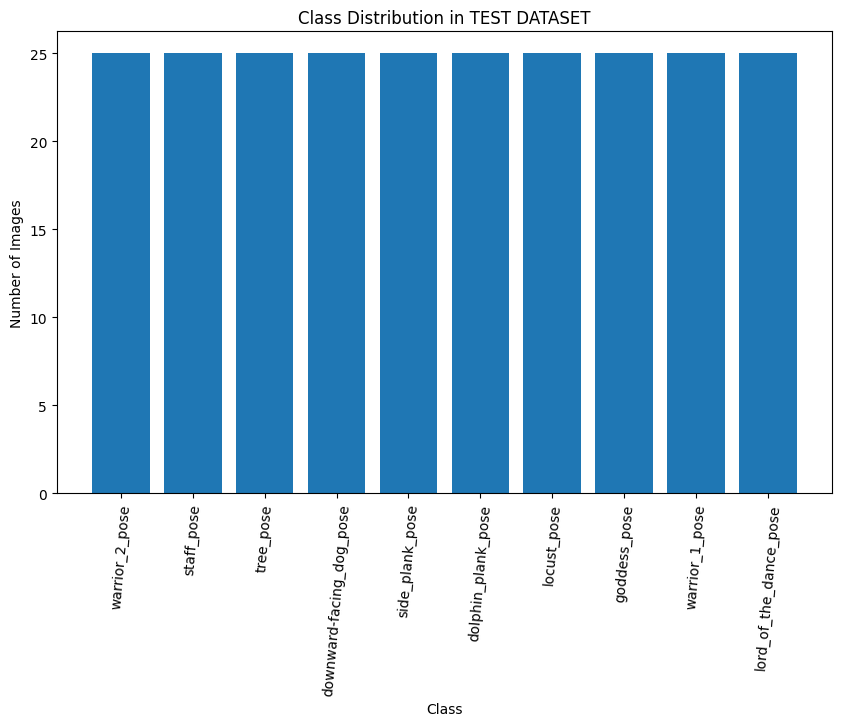

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_in_classes(parent_dir):

    class_counts = {}

    # Iterate over each folder in the parent directory
    for class_folder in os.listdir(parent_dir):
        class_path = os.path.join(parent_dir, class_folder)

        # Check if it is a directory
        if os.path.isdir(class_path):
            # Count the number of images in the class folder
            num_images = len(os.listdir(class_path))
            class_counts[class_folder] = num_images

    return class_counts

# Set the parent directory path for the TEST dataset
test_dir = '/content/drive/MyDrive/Yoga-16/New Test'

# Get the image counts for each class
test_class_counts = count_images_in_classes(test_dir)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(test_class_counts.keys(), test_class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in TEST DATASET')
plt.xticks(rotation=85)
plt.show()

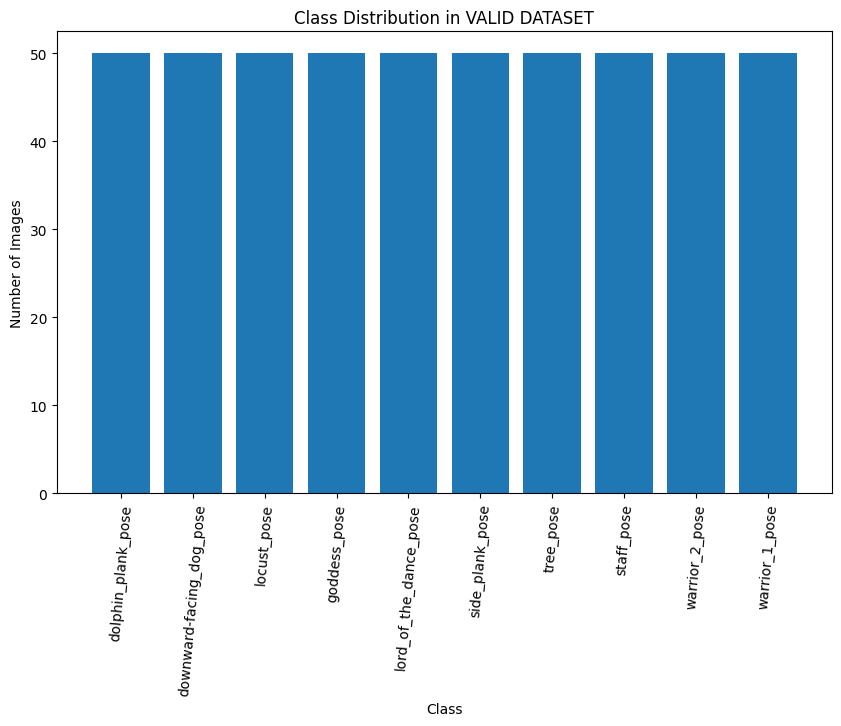

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_in_classes(parent_dir):

    class_counts = {}

    # Iterate over each folder in the parent directory
    for class_folder in os.listdir(parent_dir):
        class_path = os.path.join(parent_dir, class_folder)

        # Check if it is a directory
        if os.path.isdir(class_path):
            # Count the number of images in the class folder
            num_images = len(os.listdir(class_path))
            class_counts[class_folder] = num_images

    return class_counts

# Set the parent directory path for the VALID dataset
valid_dir = '/content/drive/MyDrive/Yoga-16/New Valid'

# Get the image counts for each class
valid_class_counts = count_images_in_classes(valid_dir)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(valid_class_counts.keys(), valid_class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in VALID DATASET')
plt.xticks(rotation=85)
plt.show()

In [ ]:
import os

train_dir = '/content/drive/MyDrive/Yoga-16/New Train'

# Get the class names by listing the subdirectories in the training directory
class_names = [f for f in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, f))]

num_classes = len(class_names)
print(class_names)

['dolphin_plank_pose', 'downward-facing_dog_pose', 'lord_of_the_dance_pose', 'goddess_pose', 'tree_pose', 'warrior_2_pose', 'locust_pose', 'side_plank_pose', 'staff_pose', 'warrior_1_pose']


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the directories
train_dir = '/content/drive/MyDrive/Yoga-16/Train'
val_dir = '/content/drive/MyDrive/Yoga-16/Valid'
test_dir = '/content/drive/MyDrive/Yoga-16/Test'

# Target image size
image_size = (224, 224)

def load_and_preprocess_images(directory):
    images = []
    labels = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, image_size)
                    img = img / 255.0  # Normalize pixel values
                    images.append(img)
                    labels.append(class_name)
    return np.array(images), np.array(labels)

# Load and preprocess images from each directory
X_train, y_train = load_and_preprocess_images(train_dir)
X_val, y_val = load_and_preprocess_images(val_dir)
X_test, y_test = load_and_preprocess_images(test_dir)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)


Training set shape: (571, 224, 224, 3)
Validation set shape: (79, 224, 224, 3)
Test set shape: (155, 224, 224, 3)
Max pixel value in training set: 1.0
Min pixel value in training set: 0.0
Sample images from the training set:


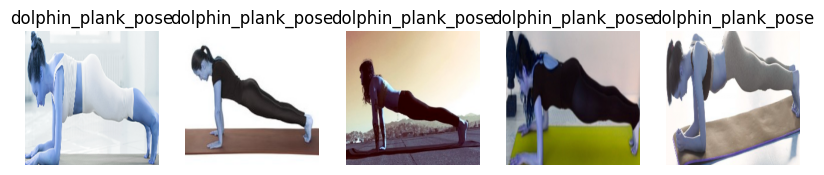

Sample images from the validation set:


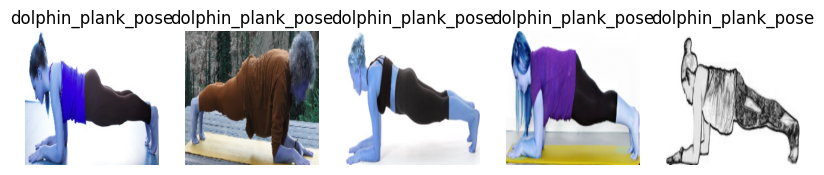

Sample images from the test set:


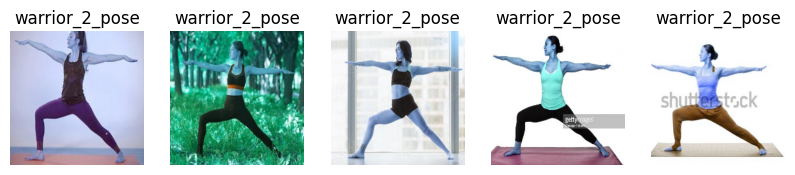

Class distribution in training set: Counter({'locust_pose': 65, 'side_plank_pose': 58, 'dolphin_plank_pose': 56, 'downward-facing_dog_pose': 56, 'lord_of_the_dance_pose': 56, 'goddess_pose': 56, 'tree_pose': 56, 'warrior_2_pose': 56, 'staff_pose': 56, 'warrior_1_pose': 56})
Class distribution in validation set: Counter({'dolphin_plank_pose': 8, 'downward-facing_dog_pose': 8, 'locust_pose': 8, 'goddess_pose': 8, 'lord_of_the_dance_pose': 8, 'side_plank_pose': 8, 'tree_pose': 8, 'warrior_2_pose': 8, 'warrior_1_pose': 8, 'staff_pose': 7})
Class distribution in test set: Counter({'staff_pose': 16, 'downward-facing_dog_pose': 16, 'dolphin_plank_pose': 16, 'warrior_1_pose': 16, 'lord_of_the_dance_pose': 16, 'warrior_2_pose': 15, 'tree_pose': 15, 'side_plank_pose': 15, 'locust_pose': 15, 'goddess_pose': 15})


In [ ]:
import matplotlib.pyplot as plt

# 1. Check the shape of the data
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

# 2. Check the range of pixel values (should be between 0 and 1)
print("Max pixel value in training set:", X_train.max())
print("Min pixel value in training set:", X_train.min())

# 3. Visualize a few images from each set
def display_images(images, labels, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

print("Sample images from the training set:")
display_images(X_train, y_train)

print("Sample images from the validation set:")
display_images(X_val, y_val)

print("Sample images from the test set:")
display_images(X_test, y_test)

# 4. Check class distribution
import collections
train_class_counts = collections.Counter(y_train)
val_class_counts = collections.Counter(y_val)
test_class_counts = collections.Counter(y_test)

print("Class distribution in training set:", train_class_counts)
print("Class distribution in validation set:", val_class_counts)
print("Class distribution in test set:", test_class_counts)


In [ ]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

x = Flatten()(vgg16_base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg16_base.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,171,658 (80.76 MB)

 Trainable params: 6,456,970 (24.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Compile the model with 'categorical_crossentropy' instead of 'sparse_categorical_crossentropy'
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,171,658 (80.76 MB)

 Trainable params: 6,456,970 (24.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Yoga-16/New Train', target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Yoga-16/New Valid', target_size=(224, 224), batch_size=32, class_mode='categorical')

# Train the model
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

Found 1000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 1048s 32s/step - accuracy: 0.1057 - loss: 3.6907 - val_accuracy: 0.1700 - val_loss: 2.2337
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 968s 30s/step - accuracy: 0.1335 - loss: 2.2956 - val_accuracy: 0.3000 - val_loss: 2.1640
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 969s 30s/step - accuracy: 0.1556 - loss: 2.2533 - val_accuracy: 0.3000 - val_loss: 2.1229
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 963s 30s/step - accuracy: 0.1570 - loss: 2.2398 - val_accuracy: 0.3000 - val_loss: 2.0082
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 979s 30s/step - accuracy: 0.1801 - loss: 2.1697 - val_accuracy: 0.3000 - val_loss: 2.0074
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 963s 30s/step - accuracy: 0.2015 - loss: 2.1752 - val_accuracy: 0.3000 - val_loss: 1.9394
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 962s 30s/step - accuracy: 0.1834 - loss: 2.1136 - val_accuracy: 0.3040 - val_loss: 1.9142
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 960s 30s/step - accuracy: 0.1877 - loss: 2.1478 - val_accuracy: 0.3980 - val

KeyboardInterrupt: 

In [ ]:
# Save the entire model
model.save('Yoga82.keras')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the trained model
model = load_model('Yoga82.keras')

# Function to preprocess a single image and make predictions
def predict_image(img_path, model):
    # Load the image (replace 'path_to_image.jpg' with the actual path)
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to the required size

    # Convert the image to an array
    img_array = image.img_to_array(img)

    # Expand the dimensions to match the model's input (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image (normalize and apply any other preprocessing)
    img_array = preprocess_input(img_array)

    # Make predictions using the loaded model
    predictions = model.predict(img_array)

    # Assuming it's a classification model with softmax, get the index of the max prediction
    predicted_class = np.argmax(predictions, axis=1)[0]

    return predicted_class

img_path = '/content/drive/MyDrive/Yoga-16/New Test/warrior_2_pose/Warrior_II_Pose_or_Virabhadrasana_II__image_44.jpg'  # Provide the path to your test image
predicted_class = predict_image(img_path, model)

# Output the predicted class
print(f"Predicted Class: {predicted_class}")

class_labels = {0: 'Dolphin Plank Pose', 1: 'Downward Facing Dog Pose', 2: 'Goddess Pose',  3: 'Locust Pose', 4: 'Lord of the Dance Pose', 5: 'Side Plank Pose', 6: 'Staff Pose', 7: 'Tree Pose', 8: 'Warrior 1 Pose',  9: 'Warrior 2 Pose'}  # Update with actual class labels
print(f"Predicted Pose: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Class: 9
Predicted Pose: Warrior 2 Pose


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the trained model
model = load_model('Yoga82.keras')

# Function to preprocess a single image and make predictions
def predict_image(img_path, model):
    # Load the image (replace 'path_to_image.jpg' with the actual path)
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to the required size

    # Convert the image to an array
    img_array = image.img_to_array(img)

    # Expand the dimensions to match the model's input (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image (normalize and apply any other preprocessing)
    img_array = preprocess_input(img_array)

    # Make predictions using the loaded model
    predictions = model.predict(img_array)

    # Assuming it's a classification model with softmax, get the index of the max prediction
    predicted_class = np.argmax(predictions, axis=1)[0]

    return predicted_class

img_path = '/content/drive/MyDrive/Yoga/YogaData/Test/Lord_of_the_Dance_Pose_or_Natarajasana_/Lord_of_the_Dance_Pose_or_Natarajasana__image_385.jpg'  # Provide the path to your test image
predicted_class = predict_image(img_path, model)

# Output the predicted class
print(f"Predicted Class: {predicted_class}")

class_labels = {0: 'Dolphin Plank Pose', 1: 'Downward Facing Dog Pose', 2: 'Goddess Pose',  3: 'Locust Pose', 4: 'Lord of the Dance Pose', 5: 'Side Plank Pose', 6: 'Staff Pose', 7: 'Tree Pose', 8: 'Warrior 1 Pose',  9: 'Warrior 2 Pose'}  # Update with actual class labels
print(f"Predicted Pose: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: 4
Predicted Pose: Lord of the Dance Pose


In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the trained model
model = load_model('Yoga82.keras')

# Function to preprocess a single image and make predictions
def predict_image(img_path, model):
    # Load the image (replace 'path_to_image.jpg' with the actual path)
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to the required size

    # Convert the image to an array
    img_array = image.img_to_array(img)

    # Expand the dimensions to match the model's input (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image (normalize and apply any other preprocessing)
    img_array = preprocess_input(img_array)

    # Make predictions using the loaded model
    predictions = model.predict(img_array)

    # Assuming it's a classification model with softmax, get the index of the max prediction
    predicted_class = np.argmax(predictions, axis=1)[0]

    return predicted_class

img_path = '/content/drive/MyDrive/Yoga-16/test image/Lord_of_the_Dance_Pose_or_Natarajasana__image_396.jpg'  # Provide the path to your test image
predicted_class = predict_image(img_path, model)

# Output the predicted class
print(f"Predicted Class: {predicted_class}")

class_labels = {0: 'Dolphin Plank Pose', 1: 'Downward Facing Dog Pose', 2: 'Goddess Pose',  3: 'Locust Pose', 4: 'Lord of the Dance Pose', 5: 'Side Plank Pose', 6: 'Staff Pose', 7: 'Tree Pose', 8: 'Warrior 1 Pose',  9: 'Warrior 2 Pose'}  # Update with actual class labels
print(f"Predicted Pose: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: 7
Predicted Pose: Tree Pose


In [ ]:
# Assuming you have a test generator set up
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Yoga-16/New Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Adjust based on your output
)

# Evaluate the model using the generator
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

# Print the test accuracy
print(f"Test accuracy: {test_acc * 100:.2f}%")


Found 250 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 - 14s - 2s/step - accuracy: 0.9640 - loss: 0.1127
Test accuracy: 96.40%


Found 250 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 87s 11s/step


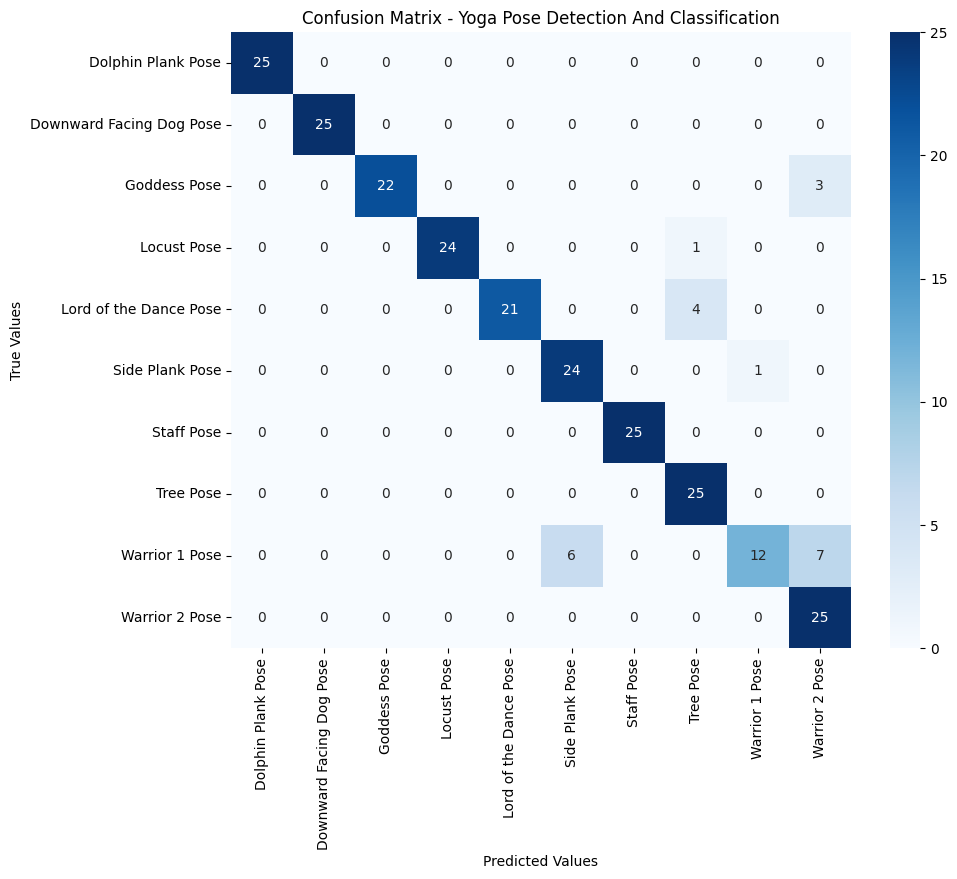

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

test_datagen = ImageDataGenerator()  # No rescaling

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Yoga-16/New Test',
    target_size=(224, 224),  # Change target_size to (224, 224) to match the model's input shape
    batch_size=32,
    class_mode='categorical',
    shuffle=False
  )

# Getting the true labels (y_test)
y_test = test_generator.classes

# Predicting the test set results (y_pred)
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)


labels = [ 'Dolphin Plank Pose', 'Downward Facing Dog Pose', 'Goddess Pose', 'Locust Pose', 'Lord of the Dance Pose', 'Side Plank Pose', 'Staff Pose','Tree Pose','Warrior 1 Pose','Warrior 2 Pose']

# Creating a dataframe for the confusion matrix for easier plotting
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Yoga Pose Detection And Classification')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Found 250 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 207s 26s/step


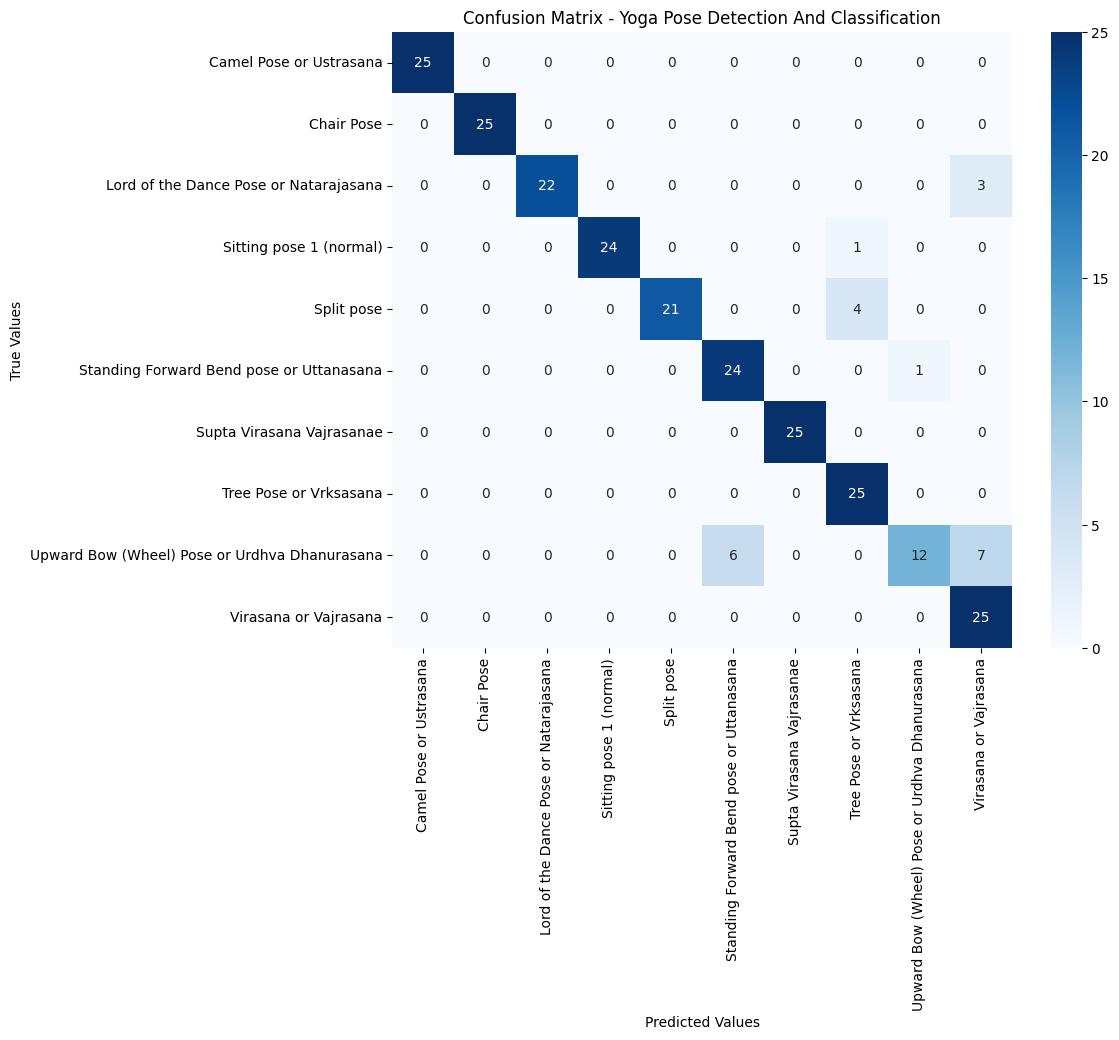

In [6]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

test_datagen = ImageDataGenerator()  # No rescaling

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Yoga-16/New Test',
    target_size=(224, 224),  # Change target_size to (224, 224) to match the model's input shape
    batch_size=32,
    class_mode='categorical',
    shuffle=False
  )

# Getting the true labels (y_test)
y_test = test_generator.classes

# Predicting the test set results (y_pred)
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)


labels = [ 'Camel Pose or Ustrasana', 'Chair Pose', 'Lord of the Dance Pose or Natarajasana', 'Sitting pose 1 (normal)', 'Split pose', 'Standing Forward Bend pose or Uttanasana', 'Supta Virasana Vajrasanae','Tree Pose or Vrksasana','Upward Bow (Wheel) Pose or Urdhva Dhanurasana','Virasana or Vajrasana']

# Creating a dataframe for the confusion matrix for easier plotting
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Yoga Pose Detection And Classification')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the validation data generator
val_datagen = ImageDataGenerator(rescale=1./255)

# Assuming 'path_to_val_data' is the directory where your validation data is stored
val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Yoga-16/New Valid',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

# Make predictions on the validation set using the generator
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)  # Get the index of the highest probability class (predicted class)

# Get true labels from the validation generator
y_true = val_generator.classes  # This gives the actual labels

# Generate the classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys())
print(report)

Found 500 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 369s 23s/step
                          precision    recall  f1-score   support

      dolphin_plank_pose       0.08      0.10      0.09        50
downward-facing_dog_pose       0.08      0.08      0.08        50
            goddess_pose       0.12      0.12      0.12        50
             locust_pose       0.07      0.06      0.07        50
  lord_of_the_dance_pose       0.06      0.06      0.06        50
         side_plank_pose       0.16      0.16      0.16        50
              staff_pose       0.14      0.14      0.14        50
               tree_pose       0.10      0.10      0.10        50
          warrior_1_pose       0.06      0.06      0.06        50
          warrior_2_pose       0.12      0.12      0.12        50

                accuracy                           0.10       500
               macro avg       0.10      0.10      0.10       500
            weighted avg       0.10      0.10      0.10       500



In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the validation data generator
val_datagen = ImageDataGenerator(rescale=1./255)

# Assuming 'path_to_val_data' is the directory where your validation data is stored
val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Yoga-16/New Train',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

# Make predictions on the validation set using the generator
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)  # Get the index of the highest probability class (predicted class)

# Get true labels from the validation generator
y_true = val_generator.classes  # This gives the actual labels

# Generate the classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys())
print(report)

Found 1000 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 754s 23s/step
                          precision    recall  f1-score   support

      dolphin_plank_pose       0.09      0.09      0.09       100
downward-facing_dog_pose       0.10      0.10      0.10       100
            goddess_pose       0.10      0.10      0.10       100
             locust_pose       0.13      0.13      0.13       100
  lord_of_the_dance_pose       0.06      0.06      0.06       100
         side_plank_pose       0.08      0.08      0.08       100
              staff_pose       0.12      0.12      0.12       100
               tree_pose       0.12      0.12      0.12       100
          warrior_1_pose       0.11      0.11      0.11       100
          warrior_2_pose       0.04      0.04      0.04       100

                accuracy                           0.10      1000
               macro avg       0.10      0.10      0.10      1000
            weighted avg       0.10      0.10      0.10      1000



In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the validation data generator
val_datagen = ImageDataGenerator(rescale=1./255)

# Assuming 'path_to_val_data' is the directory where your validation data is stored
val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Yoga-16/New Test',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

# Make predictions on the validation set using the generator
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)  # Get the index of the highest probability class (predicted class)

# Get true labels from the validation generator
y_true = val_generator.classes  # This gives the actual labels

# Generate the classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys())
print(report)

Found 250 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 186s 23s/step
                          precision    recall  f1-score   support

      dolphin_plank_pose       0.00      0.00      0.00        25
downward-facing_dog_pose       0.04      0.04      0.04        25
            goddess_pose       0.13      0.16      0.15        25
             locust_pose       0.21      0.20      0.20        25
  lord_of_the_dance_pose       0.14      0.12      0.13        25
         side_plank_pose       0.04      0.04      0.04        25
              staff_pose       0.04      0.04      0.04        25
               tree_pose       0.08      0.08      0.08        25
          warrior_1_pose       0.04      0.04      0.04        25
          warrior_2_pose       0.16      0.16      0.16        25

                accuracy                           0.09       250
               macro avg       0.09      0.09      0.09       250
            weighted avg       0.09      0.09      0.09       250



In [10]:
#classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys())
print(report)

                          precision    recall  f1-score   support

      dolphin_plank_pose       0.00      0.00      0.00        25
downward-facing_dog_pose       0.04      0.04      0.04        25
            goddess_pose       0.13      0.16      0.15        25
             locust_pose       0.21      0.20      0.20        25
  lord_of_the_dance_pose       0.14      0.12      0.13        25
         side_plank_pose       0.04      0.04      0.04        25
              staff_pose       0.04      0.04      0.04        25
               tree_pose       0.08      0.08      0.08        25
          warrior_1_pose       0.04      0.04      0.04        25
          warrior_2_pose       0.16      0.16      0.16        25

                accuracy                           0.09       250
               macro avg       0.09      0.09      0.09       250
            weighted avg       0.09      0.09      0.09       250

